<a href="https://colab.research.google.com/github/EricCallaway/COSC_5313_CNN_model_HW-5/blob/main/CNN_model_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary Libraries

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics


Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
img_data_path_1 = "/content/drive/MyDrive/Data/HW#5_Dataset/imgs1/"
img_data_path_2 = "/content/drive/MyDrive/Data/HW#5_Dataset/imgs2/"
file_data = "/content/drive/MyDrive/Data/HW#5_Dataset/file_data.csv"
class_0_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_0.csv"
class_1_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_1.csv"
class_2_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_2.csv"
class_3_path = "/content/drive/MyDrive/Data/HW#5_Dataset/class_3.csv"


df = pd.read_csv(file_data)
df_class_0 = pd.read_csv(class_0_path)
df_class_1 = pd.read_csv(class_1_path)
df_class_2 = pd.read_csv(class_2_path)
df_class_3 = pd.read_csv(class_3_path)


seq_nums = df['seq_num'].values
file_name = df[' file_name'].values
class_label = df[' class_label'].values



In [4]:
# pip install split-folders

In [5]:
# import splitfolders
# input = '/content/drive/MyDrive/Data/HW#5_Dataset/imgs1'
# output = 'final_dataset'
# splitfolders.ratio(input, output=output, seed=1337, ratio=(.7, 0.15,0.15))

In [6]:
train_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/train/'
test_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/test/'
val_path = '/content/drive/MyDrive/Data/HW#5_Dataset/final_dataset/val/'

In [7]:
batch_size = 32
HEIGHT = 180
WIDTH = 180

In [8]:
import os
import cv2
x_train = []
for folder in os.listdir(train_path):
  sub_path = train_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_train.append(img_arr)



In [9]:
print(len(x_train))

3043


In [10]:
x_test = []
for folder in os.listdir(test_path):
  sub_path = test_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_test.append(img_arr)

In [11]:
print(len(x_test))

655


In [12]:
x_val = []
for folder in os.listdir(val_path):
  sub_path = val_path + folder
  for img in os.listdir(sub_path):
    image_path = sub_path + '/' + img
    img_arr = cv2.imread(image_path)
    img_arr=cv2.resize(img_arr,(HEIGHT,WIDTH))
    x_val.append(img_arr)

In [13]:
print(len(x_val))

651


Turn our Train, Test, and Validation lists into numpy arrays.
Also normalize the values in the arrays between the values 0 and 1. We do this by dividing each element in the array by 255.

In [14]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)

train_x = train_x/255.0
test_x = test_x/255.0
val_x = val_x/255.0

Compute labels of corresponding datasets using ImgageDataGenerator. We use this because our images are stored in folders. We must walk through the folders and find out the corresoponding labels of images stored here. 

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (HEIGHT, WIDTH),
                                                 batch_size = batch_size,
                                                 class_mode = 'sparse',
                                                 classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (HEIGHT, WIDTH),
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (HEIGHT, WIDTH),
                                            batch_size = batch_size,
                                            class_mode = 'sparse',
                                            classes={'normal': 0, 'glue_defects': 1, 'bubble_defects': 2, 'object_defects': 3})

Found 3043 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 651 images belonging to 4 classes.


In [17]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

This shows the indicies of each class.

In [18]:
val_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

In [19]:
test_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

In [20]:
training_set.class_indices

{'bubble_defects': 2, 'glue_defects': 1, 'normal': 0, 'object_defects': 3}

Shape of each set. Notice they are all 1D arrays

In [21]:
train_y.shape

(3043,)

In [22]:
test_y.shape

(655,)

In [23]:
val_y.shape

(651,)

Build the Model

In [24]:
num_classes= 4

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Applying Early Stopping to avoid overfitting of the model

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

Compile the Model

In [26]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Fit the Model

In [27]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=5,
  callbacks=[early_stop],
  batch_size=batch_size,shuffle=True)

Epoch 1/5
96/96 [==============================] - 114s 1s/step - loss: 0.7782 - accuracy: 0.7871 - val_loss: 0.7327 - val_accuracy: 0.7942
Epoch 2/5
96/96 [==============================] - 112s 1s/step - loss: 0.7467 - accuracy: 0.7936 - val_loss: 0.7302 - val_accuracy: 0.7942
Epoch 3/5
96/96 [==============================] - 112s 1s/step - loss: 0.7384 - accuracy: 0.7936 - val_loss: 0.7421 - val_accuracy: 0.7942
Epoch 4/5
96/96 [==============================] - 112s 1s/step - loss: 0.7410 - accuracy: 0.7936 - val_loss: 0.7340 - val_accuracy: 0.7942
Epoch 5/5
96/96 [==============================] - 111s 1s/step - loss: 0.7408 - accuracy: 0.7936 - val_loss: 0.7339 - val_accuracy: 0.7942


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        9

Visualizing Loss and Accuracy

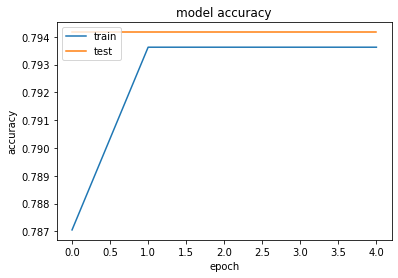

In [29]:
#Summarizing History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

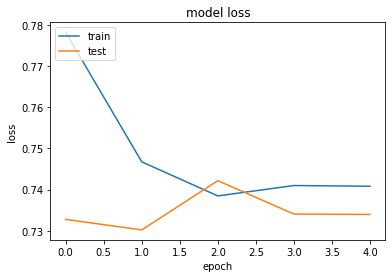

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate model

In [31]:
score = model.evaluate(test_x, test_y)
print('Test Accuracy {}'.format(score[1]))

21/21 [==============================] - 6s 274ms/step - loss: 0.7433 - accuracy: 0.7908
Test Accuracy 0.790839672088623


In [32]:
print(history.history.keys())
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


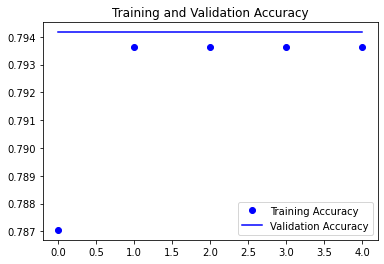

In [33]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

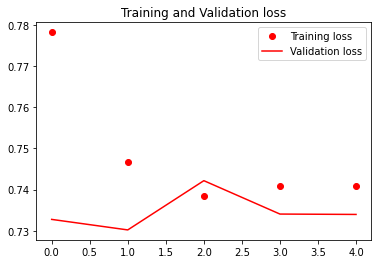

In [34]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

Creating a numpy array of predicted y(label) values and list of actual y(label) values.

In [35]:
predicted_classes = model.predict(test_x)
y_true = test_y

Creating a dataframe of the predicted values. Also, here I'm creating a list of prediction that the model made by returning the column id of the max element in each row. This will return the class id of the predicted label by the model.

In [36]:
pred_df = pd.DataFrame(predicted_classes, columns = [0,1,2,3])
class_predictions = pred_df.idxmax(axis=1)

Print Confusion Matrix

In [42]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Prediction')

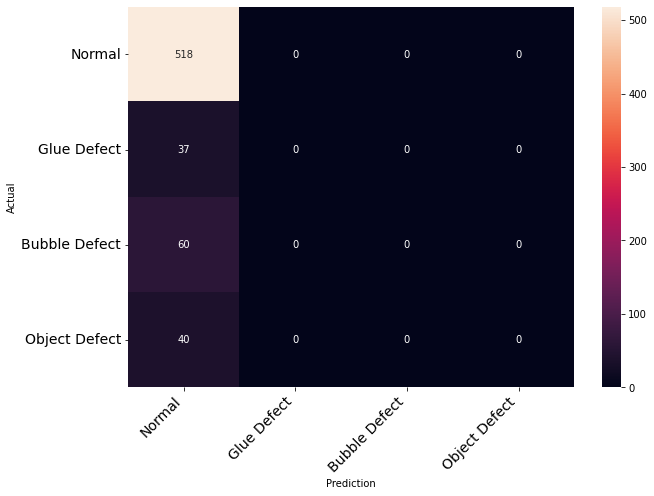

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true, class_predictions)
print_confusion_matrix(cm, ["Normal", "Glue Defect", "Bubble Defect", "Object Defect"])

Precision, Recall, F1 Scores. As well as the accuracy, macro and weighted average of the F1 Scores.

In [45]:
cr = classification_report(y_true, class_predictions,target_names=['Normal', 'Glue Defect', 'Bubble Defect', 'Object Defect'], digits=3)
print(cr)

               precision    recall  f1-score   support

       Normal      0.791     1.000     0.883       518
  Glue Defect      0.000     0.000     0.000        37
Bubble Defect      0.000     0.000     0.000        60
Object Defect      0.000     0.000     0.000        40

     accuracy                          0.791       655
    macro avg      0.198     0.250     0.221       655
 weighted avg      0.625     0.791     0.698       655



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Print Results

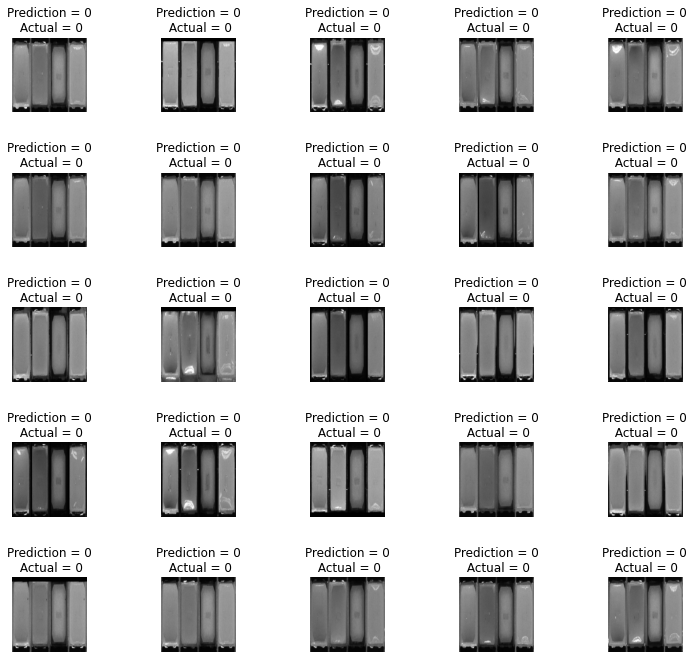

In [38]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(test_x[i])
    axes[i].set_title('Prediction = {}\n Actual = {}'.format(class_predictions[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)  